In [46]:
import sqlite3
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
db_path = 'sql/eleicao.db' 
connection = sqlite3.connect(db_path)

In [5]:
cur = connection.cursor()

# Distribuição de votos

## Por partido

C:\Users\Francisco\AppData\Local\Temp\ipykernel_7840\4103316358.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=r, x='partido', y='votos', palette='viridis')


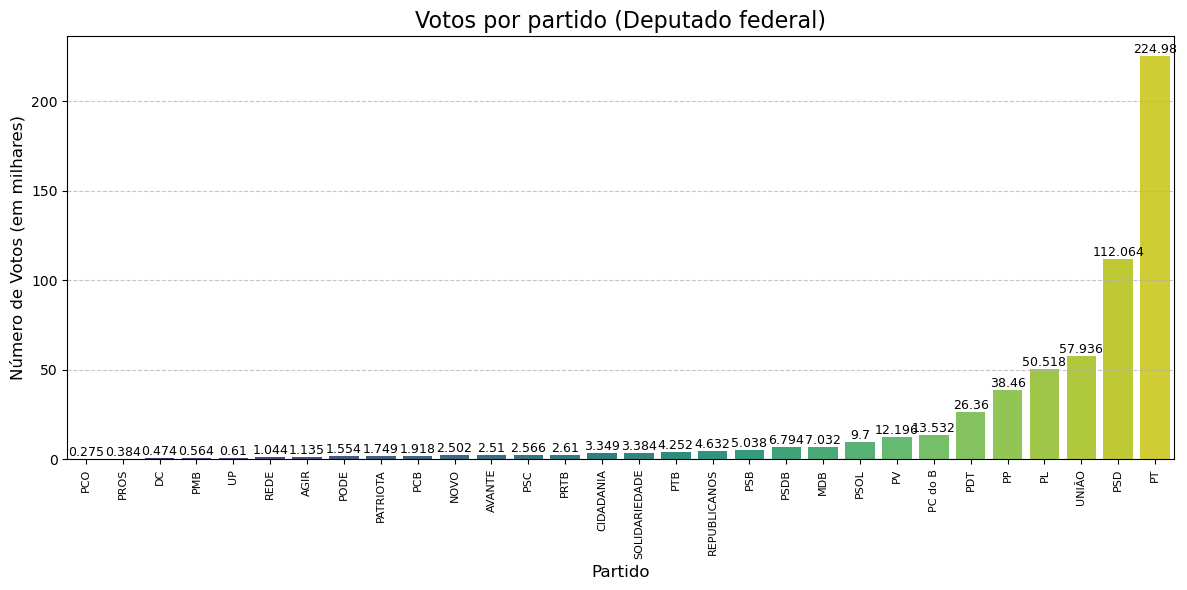

In [146]:
querry = """
SELECT p.SG_PARTIDO as partido, SUM(vp.QT_VOTOS_LEGENDA_VALIDOS) / 1000.0 as votos 
FROM votos_partido as vp, partido p
WHERE vp.DS_CARGO = 'Deputado Federal' and p.NR_PARTIDO = vp.NR_PARTIDO
GROUP BY p.SG_PARTIDO
ORDER BY votos
"""

# Run the query and store results in DataFrame r
r = pd.read_sql_query(querry, connection)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=r, x='partido', y='votos', palette='viridis')

# Enhance plot aesthetics
plt.title('Votos por partido (Deputado federal)', fontsize=16)
plt.xlabel('Partido', fontsize=12)
plt.ylabel('Número de Votos (em milhares)', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)

# Add data labels
for index, row in r.iterrows():
    plt.text(index, row['votos'], f"{row['votos']:,}", ha='center', va='bottom', fontsize=9)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('imagens/partido.png')
plt.tight_layout()
plt.show()

## Por candidato

C:\Users\Francisco\AppData\Local\Temp\ipykernel_7840\184670344.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=r, x='votos', kde=True, palette='Set2', bins=30)


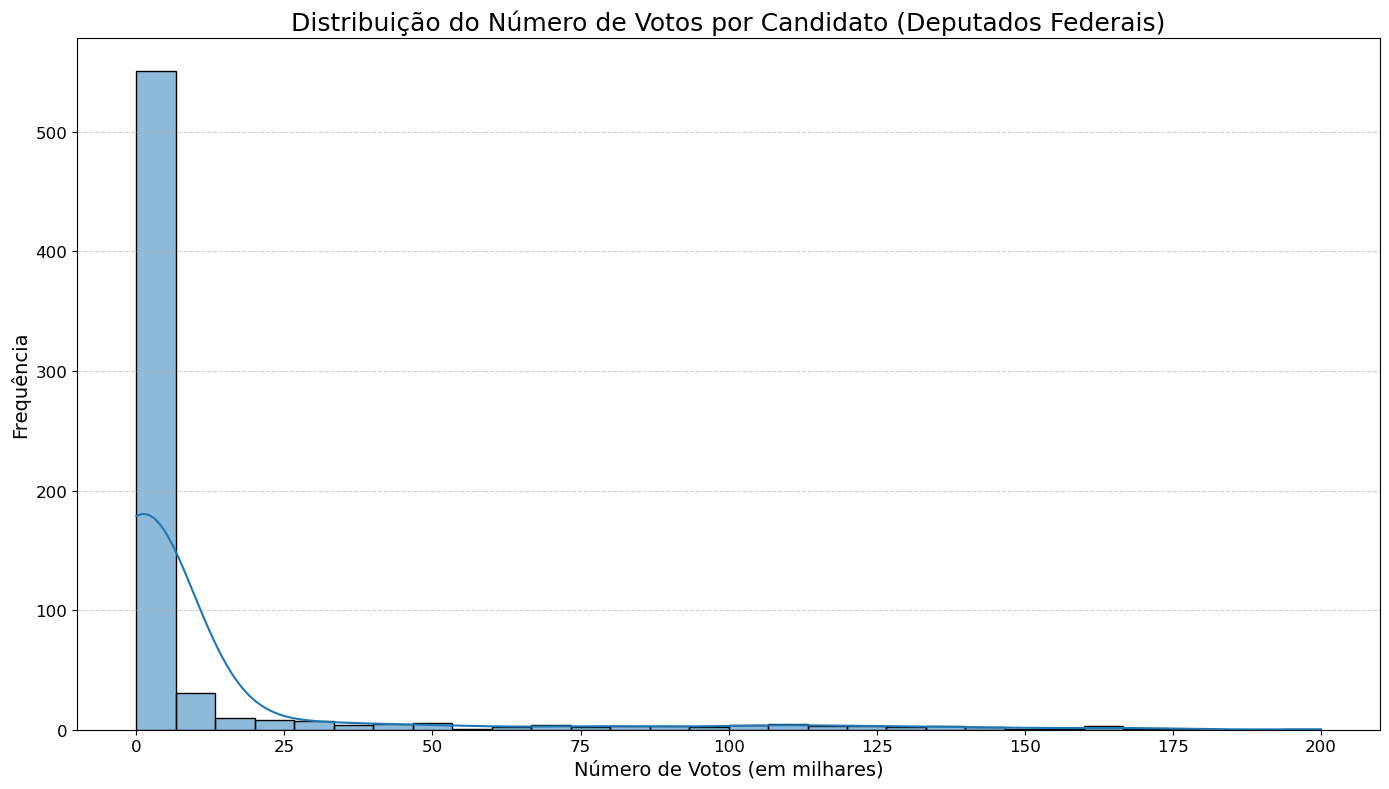

In [148]:
querry = """
SELECT  NM_CANDIDATO, SUM(QT_VOTOS_NOMINAIS_VALIDOS) / 1000 as votos, DS_SIT_TOT_TURNO as situacao
FROM votos_candidato
WHERE DS_CARGO = 'Deputado Federal'
GROUP BY NM_CANDIDATO
"""

# Obter os dados
r = pd.read_sql_query(querry, connection)

# Configurar a figura
plt.figure(figsize=(14, 8))

# Criar o histograma com distinção por situação
sns.histplot(data=r, x='votos', kde=True, palette='Set2', bins=30)

# Títulos e rótulos
plt.title('Distribuição do Número de Votos por Candidato (Deputados Federais)', fontsize=18)
plt.xlabel('Número de Votos (em milhares)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionar grades no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajustar layout
plt.savefig('imagens/candidato.png')
plt.tight_layout()
plt.show()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_7840\988979356.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=r, x='votos', kde=True, palette='Set2', bins=30)


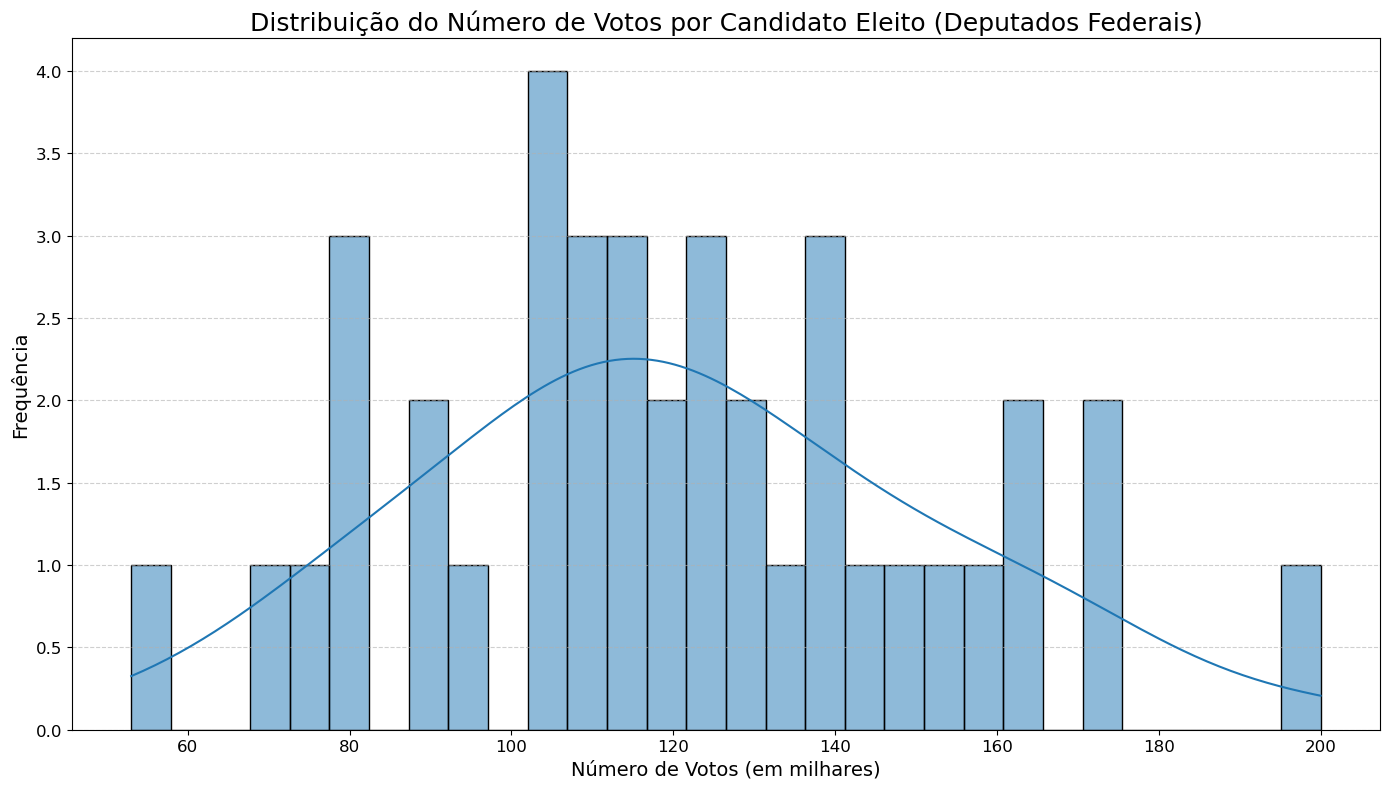

In [150]:
querry = """
SELECT  NM_CANDIDATO, SUM(QT_VOTOS_NOMINAIS_VALIDOS) / 1000 as votos, DS_SIT_TOT_TURNO as situacao
FROM votos_candidato
WHERE DS_CARGO = 'Deputado Federal' and (DS_SIT_TOT_TURNO = 'ELEITO POR QP' or DS_SIT_TOT_TURNO = 'ELEITO POR MÉDIA')
GROUP BY NM_CANDIDATO
"""

# Obter os dados
r = pd.read_sql_query(querry, connection)

# Configurar a figura
plt.figure(figsize=(14, 8))

# Criar o histograma com distinção por situação
sns.histplot(data=r, x='votos', kde=True, palette='Set2', bins=30)

# Títulos e rótulos
plt.title('Distribuição do Número de Votos por Candidato Eleito (Deputados Federais)', fontsize=18)
plt.xlabel('Número de Votos (em milhares)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionar grades no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajustar layout
plt.savefig('imagens/candidato_eleito.png')
plt.tight_layout()
plt.show()